<a href="https://colab.research.google.com/github/atlas-github/Sandbox/blob/master/Text_Mining_with_R_Chapter_3_Analyzing_word_and_document_frequency_tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: [Text Mining with R Chapter 3 Analyzing word and document frequency: tf-idf](https://www.tidytextmining.com/tfidf.html)

In [3]:
install.packages("janeaustenr")
install.packages("tidytext")
library(dplyr)
library(janeaustenr)
library(tidytext)

book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

total_words <- book_words %>% 
  group_by(book) %>% 
  summarize(total = sum(n))

book_words <- left_join(book_words, total_words)

book_words

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘SnowballC’, ‘ISOcodes’, ‘hunspell’, ‘tokenizers’, ‘stopwords’

Joining, by = "book"


book,word,n,total
<fct>,<chr>,<int>,<int>
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996
Mansfield Park,of,4778,160460
Pride & Prejudice,the,4331,122204
Emma,of,4291,160996


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 896 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

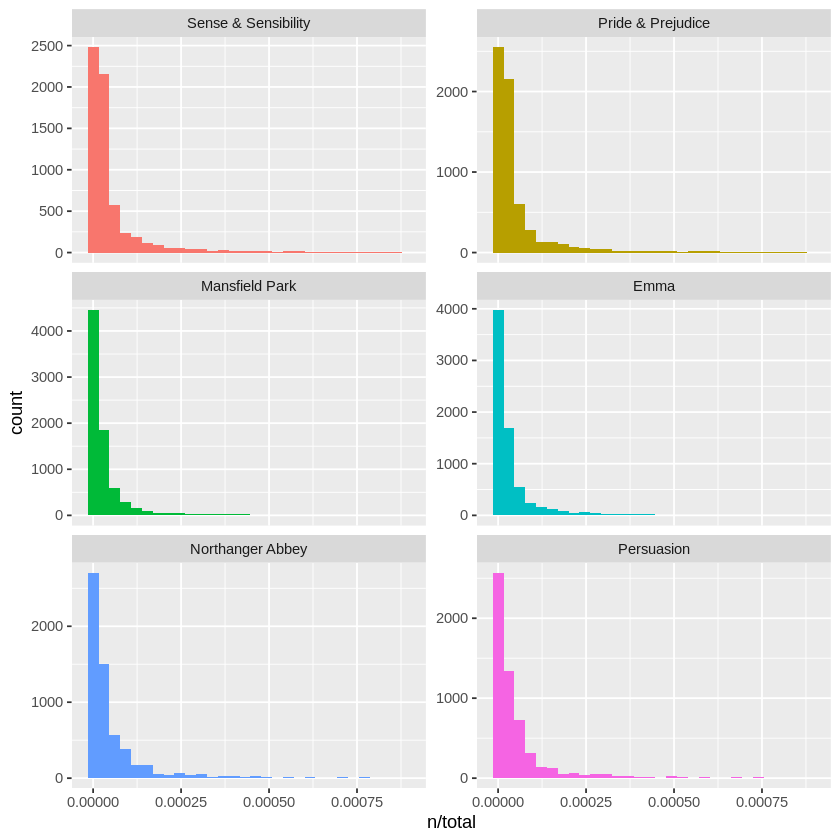

In [4]:
library(ggplot2)

ggplot(book_words, aes(n/total, fill = book)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y")

In [5]:
freq_by_rank <- book_words %>% 
  group_by(book) %>% 
  mutate(rank = row_number(), 
         `term frequency` = n/total)

freq_by_rank

book,word,n,total,rank,term frequency
<fct>,<chr>,<int>,<int>,<int>,<dbl>
Mansfield Park,the,6206,160460,1,0.03867631
Mansfield Park,to,5475,160460,2,0.03412065
Mansfield Park,and,5438,160460,3,0.03389007
Emma,to,5239,160996,1,0.03254118
Emma,the,5201,160996,2,0.03230515
Emma,and,4896,160996,3,0.03041069
Mansfield Park,of,4778,160460,4,0.02977689
Pride & Prejudice,the,4331,122204,1,0.03544074
Emma,of,4291,160996,4,0.02665284


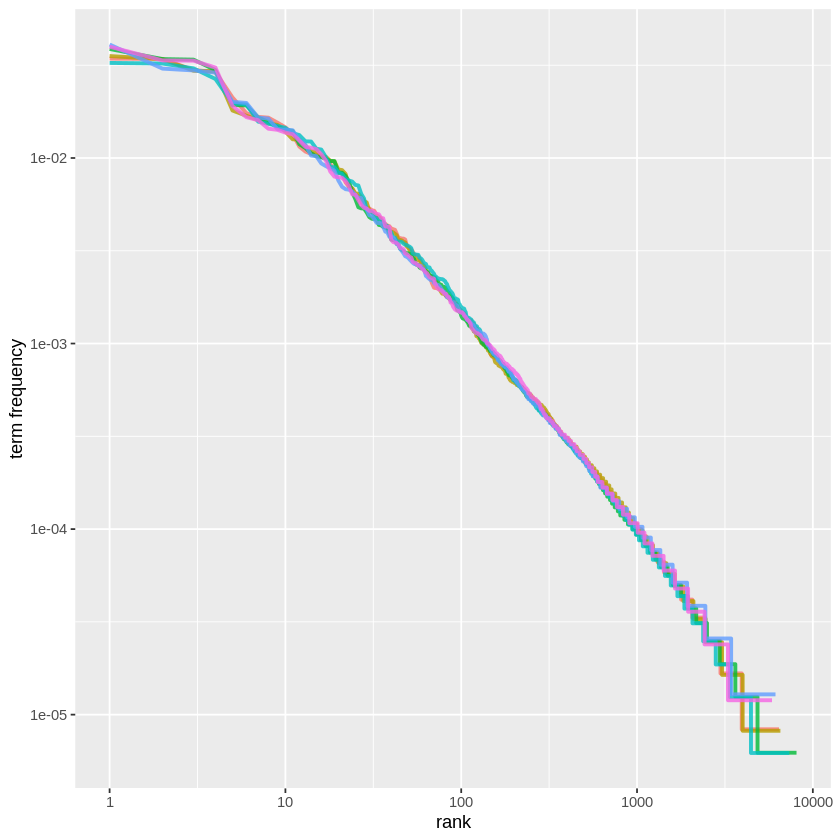

In [6]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = book)) + 
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + 
  scale_x_log10() +
  scale_y_log10()

In [7]:
rank_subset <- freq_by_rank %>% 
  filter(rank < 500,
         rank > 10)

lm(log10(`term frequency`) ~ log10(rank), data = rank_subset)


Call:
lm(formula = log10(`term frequency`) ~ log10(rank), data = rank_subset)

Coefficients:
(Intercept)  log10(rank)  
    -0.6226      -1.1125  


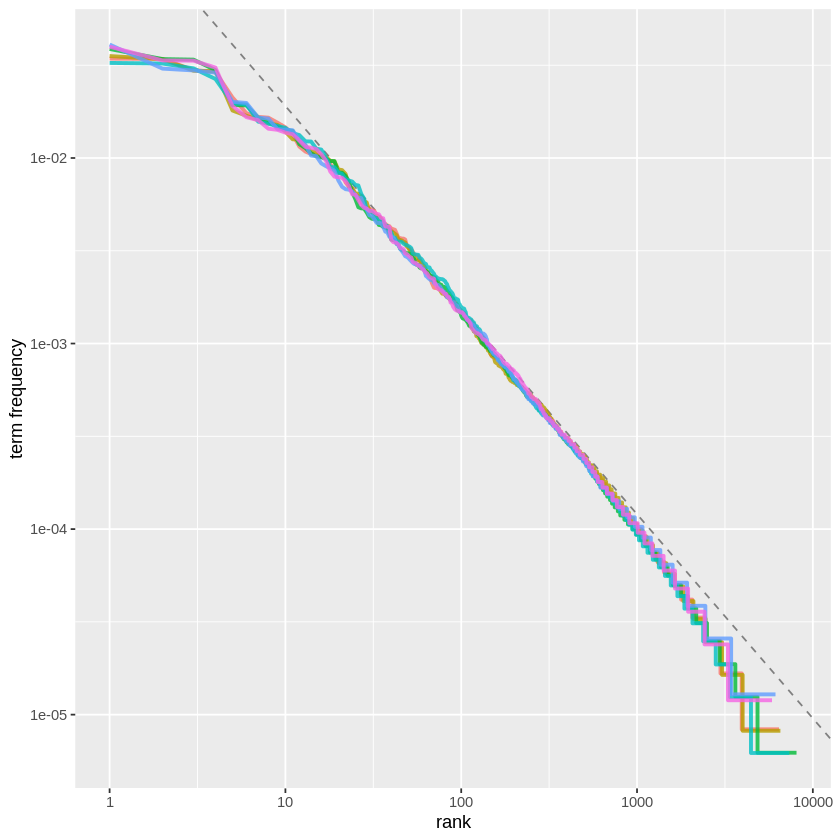

In [8]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = book)) + 
  geom_abline(intercept = -0.62, slope = -1.1, color = "gray50", linetype = 2) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + 
  scale_x_log10() +
  scale_y_log10()

In [9]:
book_words <- book_words %>%
  bind_tf_idf(word, book, n)
book_words

book,word,n,total,tf,idf,tf_idf
<fct>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Mansfield Park,the,6206,160460,0.03867631,0,0
Mansfield Park,to,5475,160460,0.03412065,0,0
Mansfield Park,and,5438,160460,0.03389007,0,0
Emma,to,5239,160996,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0,0
Mansfield Park,of,4778,160460,0.02977689,0,0
Pride & Prejudice,the,4331,122204,0.03544074,0,0
Emma,of,4291,160996,0.02665284,0,0


In [10]:
book_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

book,word,n,tf,idf,tf_idf
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Sense & Sensibility,elinor,623,0.005193528,1.7917595,0.009305552
Sense & Sensibility,marianne,492,0.004101470,1.7917595,0.007348847
Mansfield Park,crawford,493,0.003072417,1.7917595,0.005505032
Pride & Prejudice,darcy,373,0.003052273,1.7917595,0.005468939
Persuasion,elliot,254,0.003036171,1.7917595,0.005440088
Emma,emma,786,0.004882109,1.0986123,0.005363545
Northanger Abbey,tilney,196,0.002519928,1.7917595,0.004515105
Emma,weston,389,0.002416209,1.7917595,0.004329266
Pride & Prejudice,bennet,294,0.002405813,1.7917595,0.004310639


Selecting by tf_idf


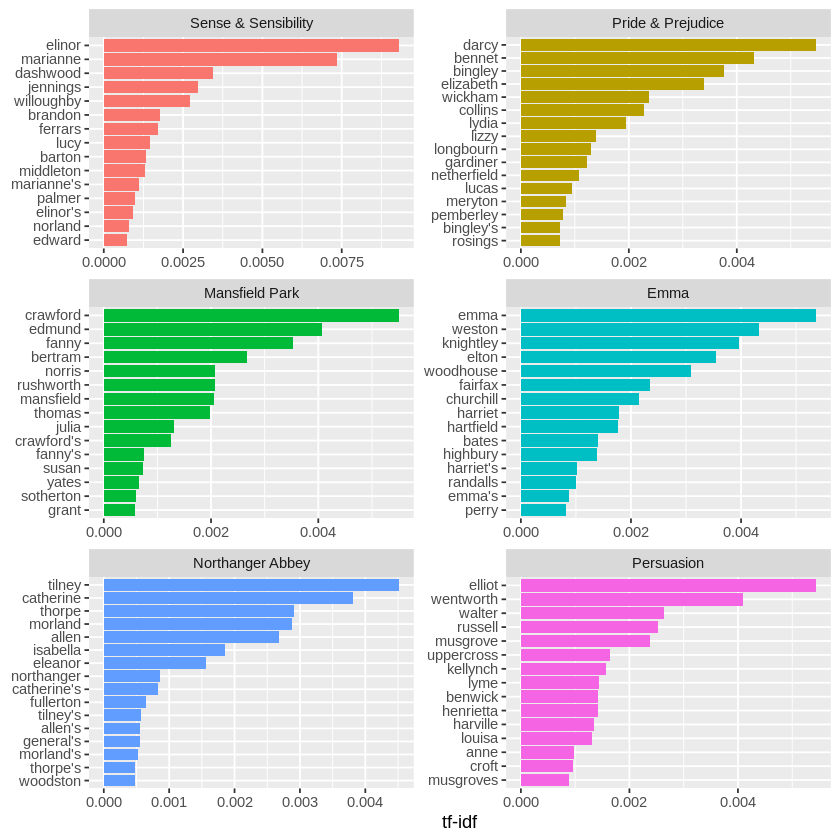

In [11]:
book_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>% 
  group_by(book) %>% 
  top_n(15) %>% 
  ungroup() %>%
  ggplot(aes(word, tf_idf, fill = book)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~book, ncol = 2, scales = "free") +
  coord_flip()

In [13]:
install.packages("gutenbergr")
library(gutenbergr)
physics <- gutenberg_download(c(37729, 14725, 13476, 5001), 
                              meta_fields = "author")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘triebeard’, ‘urltools’

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org
Warning message in .f(.x[[i]], ...):
“Could not download a book at http://aleph.gutenberg.org/5/0/0/5001/5001.zip”

In [14]:
physics_words <- physics %>%
  unnest_tokens(word, text) %>%
  count(author, word, sort = TRUE)

physics_words

author,word,n
<chr>,<chr>,<int>
"Galilei, Galileo",the,3760
"Tesla, Nikola",the,3604
"Huygens, Christiaan",the,3553
"Galilei, Galileo",of,2049
"Tesla, Nikola",of,1737
"Huygens, Christiaan",of,1708
"Huygens, Christiaan",to,1207
"Tesla, Nikola",a,1176
"Galilei, Galileo",and,1148


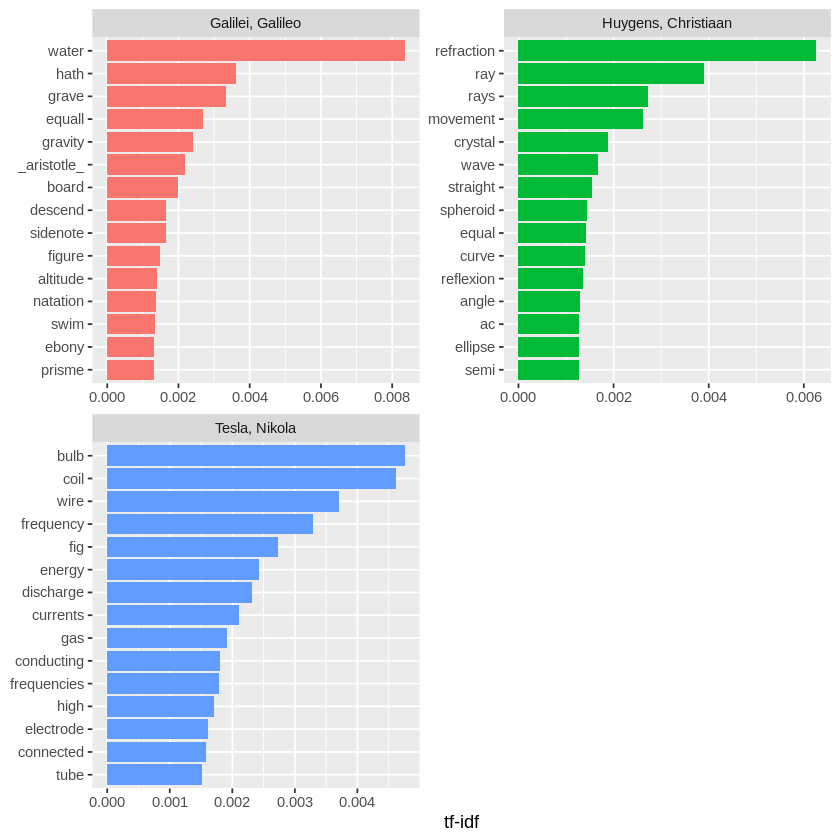

In [15]:
plot_physics <- physics_words %>%
  bind_tf_idf(word, author, n) %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan", 
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

plot_physics %>% 
  group_by(author) %>% 
  top_n(15, tf_idf) %>% 
  ungroup() %>%
  mutate(word = reorder(word, tf_idf)) %>%
  ggplot(aes(word, tf_idf, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip()

In [16]:
library(stringr)

physics %>% 
  filter(str_detect(text, "eq\\.")) %>% 
  select(text)

text
<chr>


In [17]:
physics %>% 
  filter(str_detect(text, "K1")) %>% 
  select(text)

text
<chr>


In [18]:
physics %>% 
  filter(str_detect(text, "AK")) %>% 
  select(text)

text
<chr>
"Now let us assume that the ray has come from A to C along AK, KC; the"
be equal to the time along KMN. But the time along AK is longer than
that along AL: hence the time along AKN is longer than that along ABC.
"And KC being longer than KN, the time along AKC will exceed, by as"
"line which is comprised between the perpendiculars AK, BL. Then it"
ordinary refraction. Now it appears that AK and BL dip down toward the
side where the air is less easy to penetrate: for AK being longer than
"than do AK, BL. And this suffices to show that the ray will continue"
surface AB at the points AK_k_B. Then instead of the hemispherical


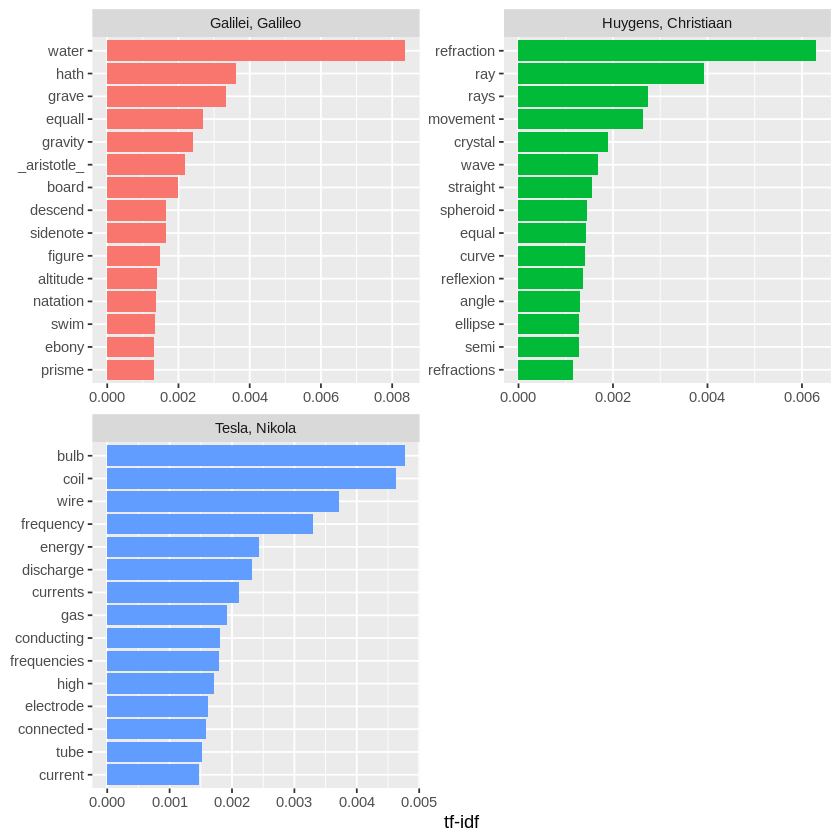

In [19]:
mystopwords <- tibble(word = c("eq", "co", "rc", "ac", "ak", "bn", 
                                   "fig", "file", "cg", "cb", "cm"))
physics_words <- anti_join(physics_words, mystopwords, by = "word")
plot_physics <- physics_words %>%
  bind_tf_idf(word, author, n) %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(author) %>% 
  top_n(15, tf_idf) %>%
  ungroup() %>%
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan",
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

ggplot(plot_physics, aes(word, tf_idf, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip()